In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
%matplotlib inline

In [31]:
data=pd.read_csv("50_Startups.csv")

# EDA and data visualization

In [32]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


<AxesSubplot:>

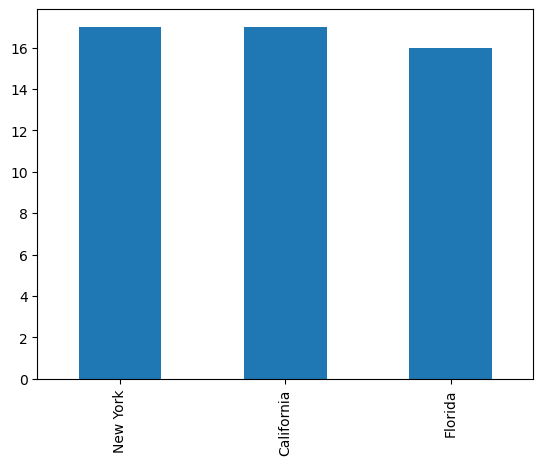

In [33]:
data["State"].value_counts().plot.bar()

In [36]:
data=data.drop(["State"],axis=1)

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   Profit           50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


In [38]:
data.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
Profit             0
dtype: int64

In [39]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [41]:
data.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


<AxesSubplot:>

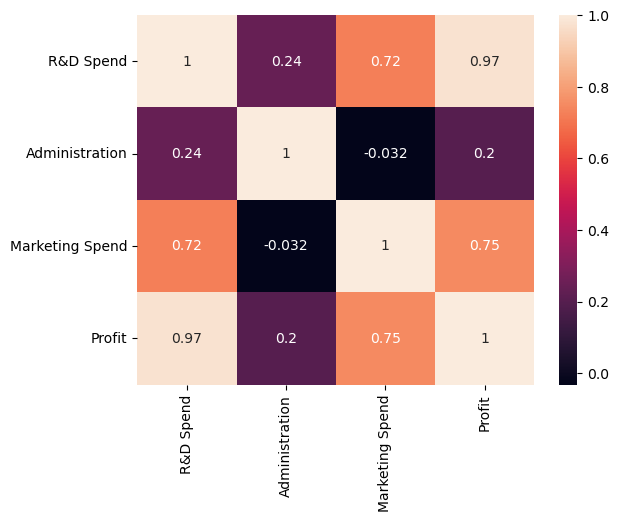

In [42]:
sns.heatmap(data.corr(),annot=True)

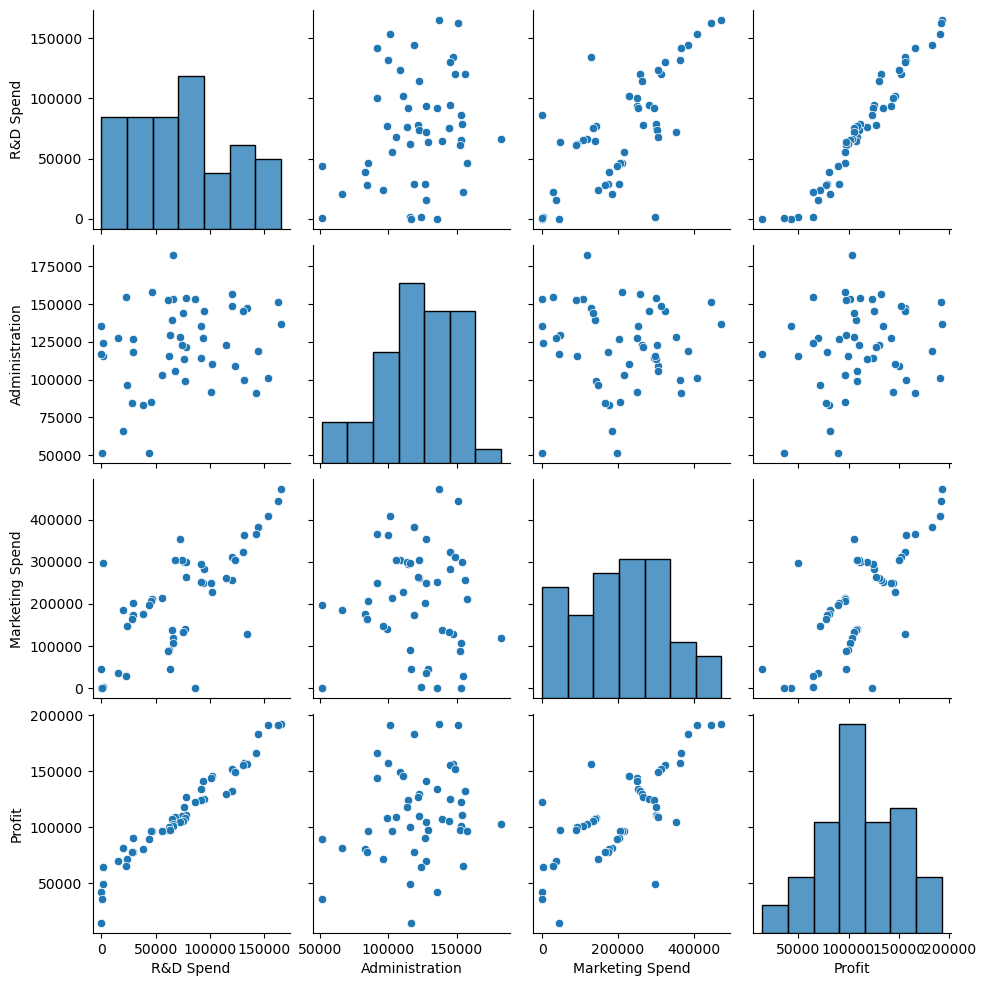

In [43]:
sns.pairplot(data)

# Calculating VIF

In [46]:
data["profit"]=data["Profit"]
data['rd']=data['R&D Spend']
data['admin']=data['Administration']
data['marketing']=data['Marketing Spend']

In [48]:
rsq_rd = smf.ols("rd~admin+marketing",data=data).fit().rsquared  
vif_rd = 1/(1-rsq_rd)
rsq_admin = smf.ols("marketing~admin+rd",data=data).fit().rsquared  
vif_admin = 1/(1-rsq_admin)
rsq_marketing = smf.ols("admin~marketing+rd",data=data).fit().rsquared  
vif_marketing = 1/(1-rsq_marketing)

In [49]:
d1 = {'Variables':["rd","admin","marketing"],'VIF':[vif_rd,vif_admin,vif_marketing]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,rd,2.468903
1,admin,2.326773
2,marketing,1.175091


# Model building

In [50]:
model=smf.ols("profit~admin+rd+marketing",data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Sat, 06 May 2023   Prob (F-statistic):           4.53e-30
Time:                        17:28:35   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
admin         -0.0268      0.051     -0.526      0.602      -0.130       0.076
rd             0.8057      0.045     17.846      0.000       0.715       0.897
marketing      0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [75]:
model2=smf.ols("profit~pow(admin,1.5)+pow(rd,1)+pow(marketing,2)",data=data).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     289.4
Date:                Sat, 06 May 2023   Prob (F-statistic):           7.41e-30
Time:                        17:45:21   Log-Likelihood:                -525.92
No. Observations:                  50   AIC:                             1060.
Df Residuals:                      46   BIC:                             1067.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          5.216e+04   4524.766     11.527      0.000    4.31e+04    6.13e+04
pow(admin, 1.5)   -7.653e-05      0.000     -0.763      0.449      -0.000       0.000
pow(rd, 1)            0.8181      0.046     17.719      0.000       0.725       0.911
pow(marketing, 2)  4.808e-08   3.85e-08      1.249      0.218   -2.94e-08    1.26e-07
==============================================================================
Omnibus:                       16.496   Durbin-Watson:                   1.197
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.612
Skew:                          -1.022   Prob(JB):                     2.74e-06
Kurtosis:                       5.849   Cond. No.                     2.73e+11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.73e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Residual Analysis

### Histogram

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

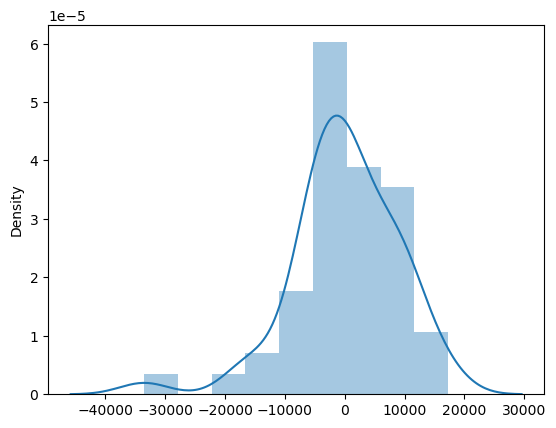

In [51]:
sns.distplot(model.resid)

### QQ plot

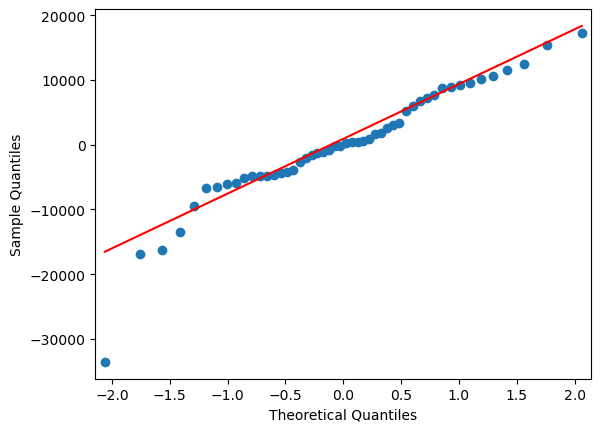

In [53]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line="q")
plt.show()

### Homoscadasticity

In [54]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

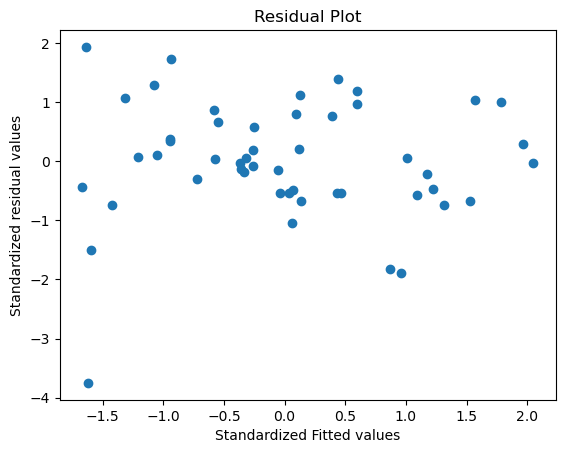

In [55]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')  
#fitted = predicted
plt.ylabel('Standardized residual values')
plt.show()

### Residual vs Regressors

eval_env: 1


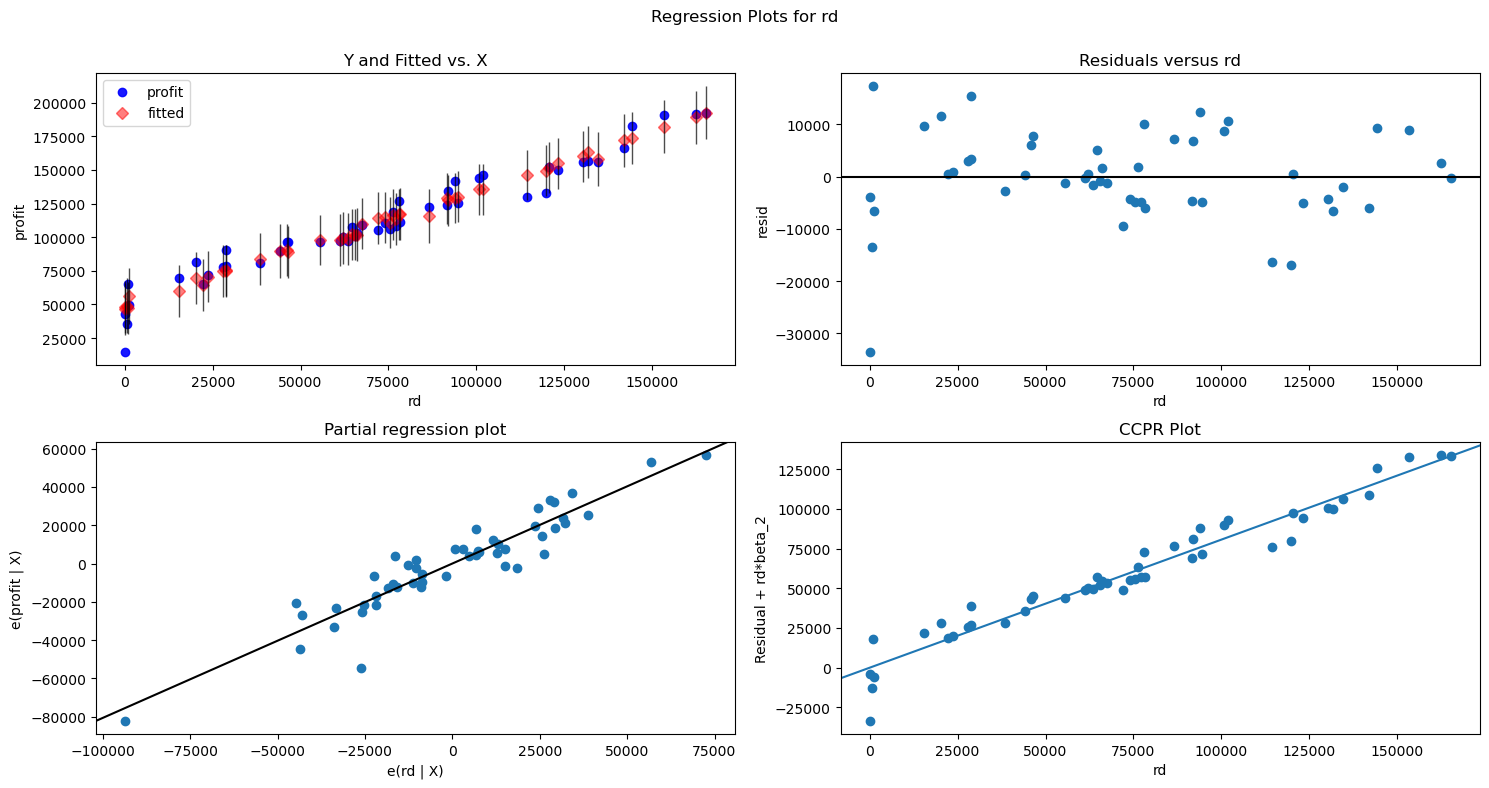

In [56]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model, "rd", fig=fig)
plt.show()

eval_env: 1


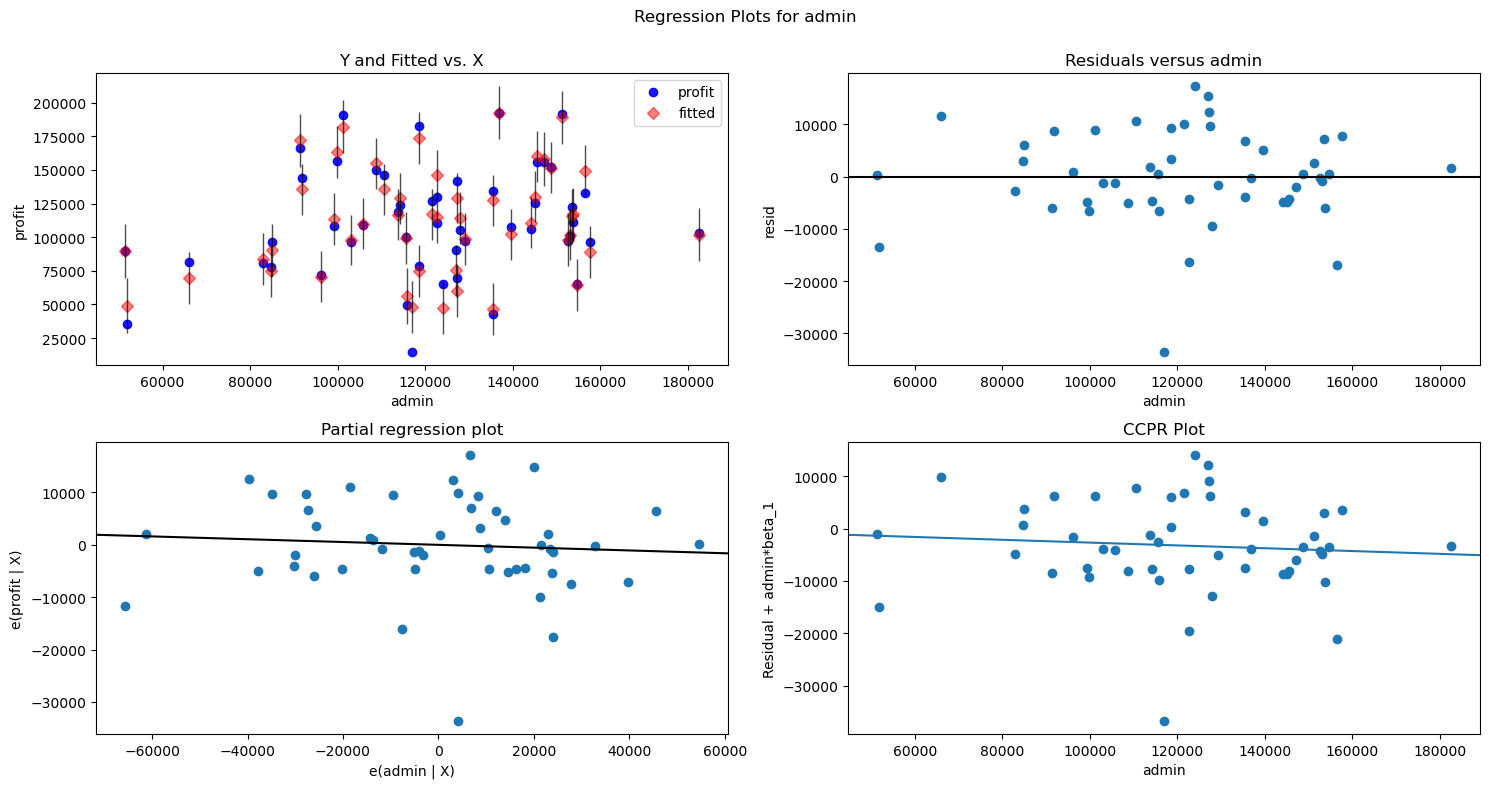

In [57]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model, "admin", fig=fig)
plt.show()

eval_env: 1


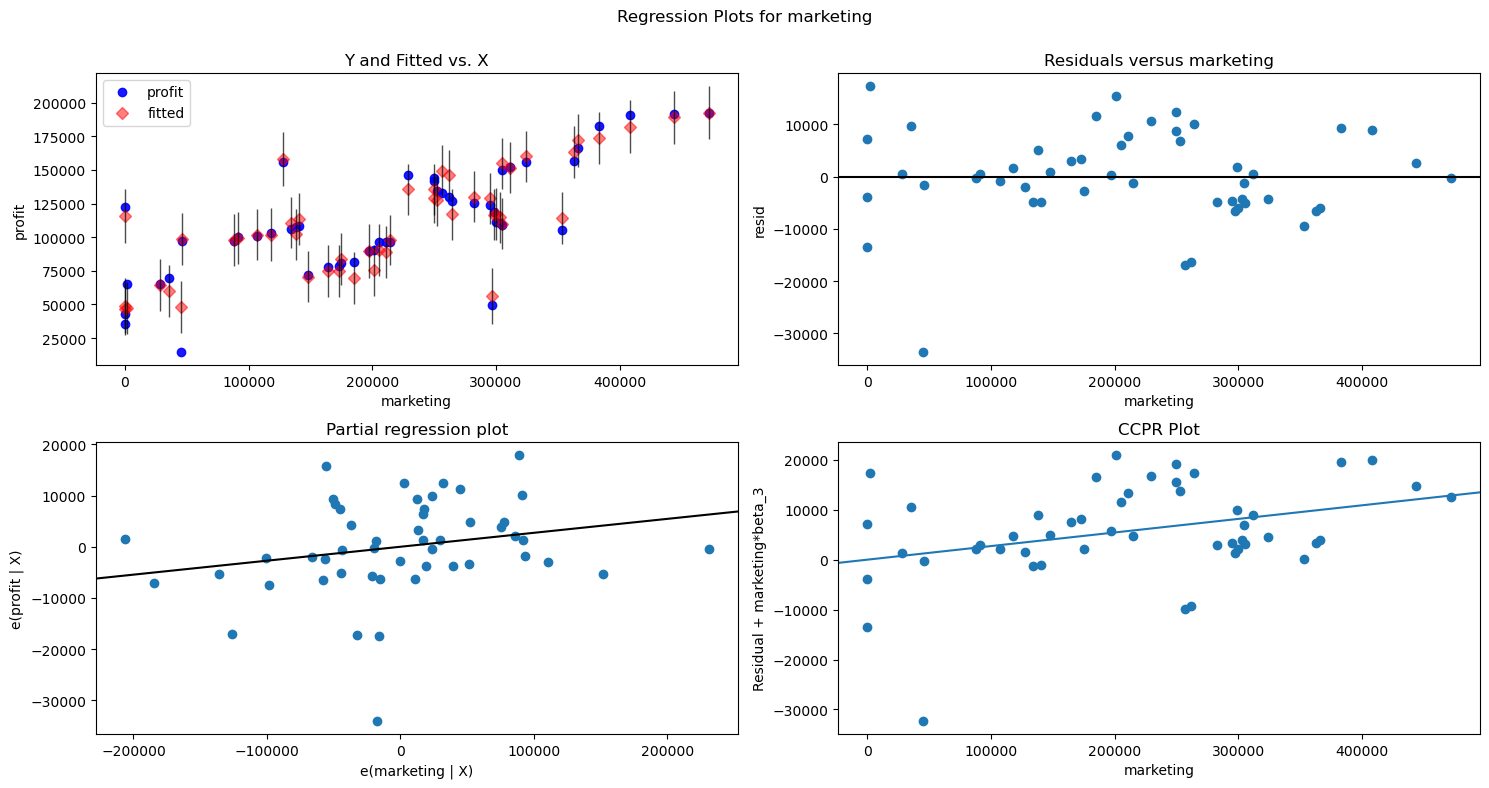

In [58]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model, "marketing", fig=fig)
plt.show()

# Model Deletion Diagnostics

### Detecting Outliers

In [59]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

In [60]:
data.shape

(50, 8)

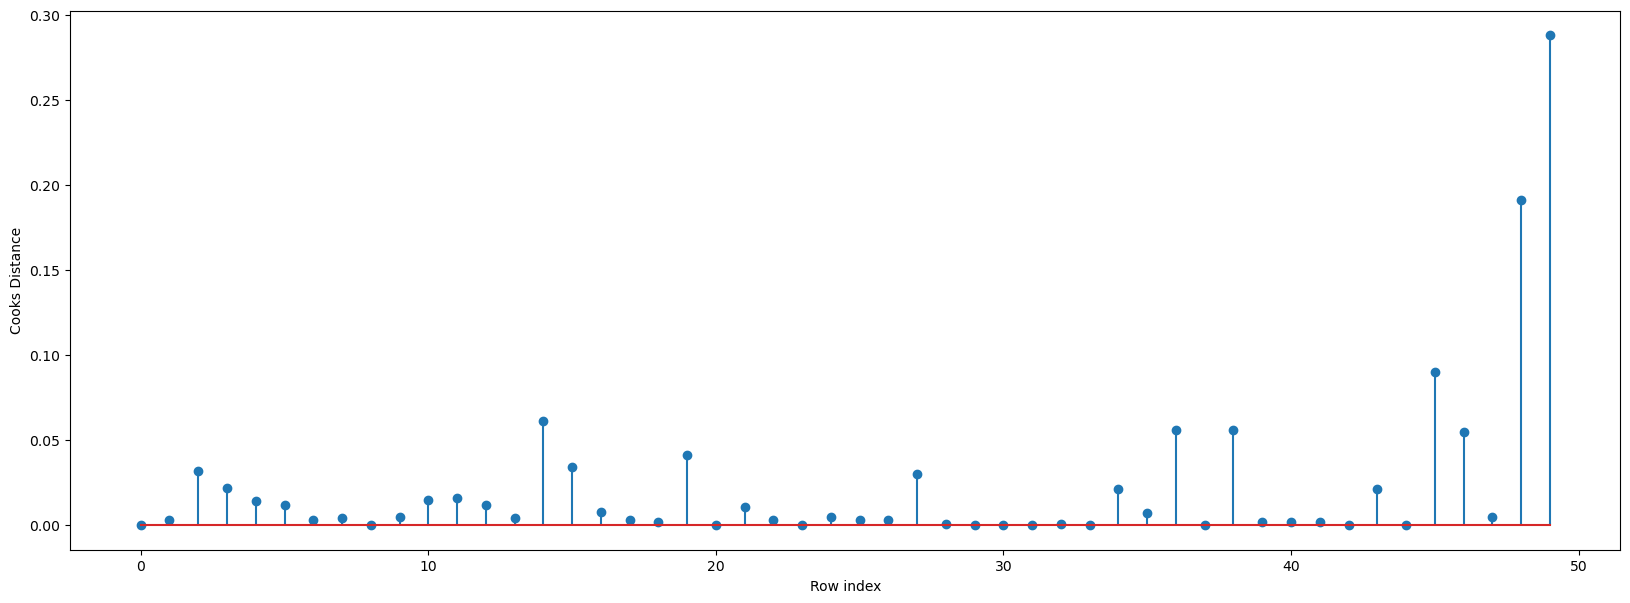

In [61]:
fig = plt.figure(figsize=(20, 7))
plt.stem(np.arange(len(data)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
# plt.ylim(0,0.018)
plt.show()

In [62]:
(np.argmax(c),np.max(c))

(49, 0.2880822927543272)

In [67]:
np.where(c>0.08)

(array([45, 48, 49], dtype=int64),)

In [68]:
new_data=data.drop([45,48,49])

In [69]:
new_data

,R&D Spend,Administration,Marketing Spend,Profit,profit,rd,admin,marketing
0,165349.20,136897.80,471784.10,192261.83,192261.83,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53,191792.06,191792.06,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54,191050.39,191050.39,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62,182901.99,182901.99,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42,166187.94,166187.94,142107.34,91391.77,366168.42
5,131876.90,99814.71,362861.36,156991.12,156991.12,131876.90,99814.71,362861.36
6,134615.46,147198.87,127716.82,156122.51,156122.51,134615.46,147198.87,127716.82
7,130298.13,145530.06,323876.68,155752.60,155752.60,130298.13,145530.06,323876.68
8,120542.52,148718.95,311613.29,152211.77,152211.77,120542.52,148718.95,311613.29
9,123334.88,108679.17,304981.62,149759.96,149759.96,123334.88,108679.17,304981.62


In [71]:
final_model = smf.ols("profit~rd+admin+marketing",data=new_data).fit()
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     384.8
Date:                Sat, 06 May 2023   Prob (F-statistic):           4.53e-31
Time:                        17:40:04   Log-Likelihood:                -481.66
No. Observations:                  47   AIC:                             971.3
Df Residuals:                      43   BIC:                             978.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.768e+04   5797.113      9.949      0.000     4.6e+04    6.94e+04
rd             0.7954      0.035     22.434      0.000       0.724       0.867
admin         -0.0636      0.043     -1.489      0.144      -0.150       0.023
marketing      0.0201      0.013      1.515      0.137      -0.007       0.047
==============================================================================
Omnibus:                        0.026   Durbin-Watson:                   1.728
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.201
Skew:                          -0.021   Prob(JB):                        0.905
Kurtosis:                       2.683   Cond. No.                     1.60e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.6e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [72]:
(final_model.rsquared,final_model.aic)

(0.9640877256125092, 971.3123824689237)

# predicting for new data

In [73]:
profit_startup=pd.DataFrame({"rd" : 190000 , "admin" : 160000 , "marketing" : 5200000 },index=[1]) 
final_model.predict(profit_startup)

1    303022.01185
dtype: float64

In [76]:
final_model.predict()

array([189966.57327568, 186297.91127159, 181485.61051156, 172661.46505878,
       172251.75391019, 163512.59956052, 157958.88984746, 158568.68790718,
       150360.08841914, 154992.86041605, 136309.91163309, 136931.01093228,
       129259.40023951, 127308.05478492, 148279.74925589, 146231.09594315,
       117306.52962382, 129419.02359942, 129317.81863332, 116658.12113341,
       117087.43432608, 116271.33898434, 114817.1576909 , 110788.75973831,
       115469.41603583, 103010.75149377, 111123.35260282, 113994.2610923 ,
       100977.24092497, 102283.59190665, 101466.4759014 ,  98369.98212551,
       100824.21917369,  99574.92118147,  88812.63878769,  92996.1062549 ,
        76437.37325673,  93425.33735905,  73294.18214464,  86584.52451718,
        76481.5649569 ,  77779.74687218,  73337.47498076,  62626.39987654,
        66045.89657177,  57325.45106538,  49068.31422126])

In [77]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     384.8
Date:                Sat, 06 May 2023   Prob (F-statistic):           4.53e-31
Time:                        17:46:16   Log-Likelihood:                -481.66
No. Observations:                  47   AIC:                             971.3
Df Residuals:                      43   BIC:                             978.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.768e+04   5797.113      9.949      0.000     4.6e+04    6.94e+04
rd             0.7954      0.035     22.434      0.000       0.724       0.867
admin         -0.0636      0.043     -1.489      0.144      -0.150       0.023
marketing      0.0201      0.013      1.515      0.137      -0.007       0.047
==============================================================================
Omnibus:                        0.026   Durbin-Watson:                   1.728
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.201
Skew:                          -0.021   Prob(JB):                        0.905
Kurtosis:                       2.683   Cond. No.                     1.60e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.6e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""